In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.shape

(319795, 18)

In [4]:
data.replace("Yes", 1, inplace = True)
data.replace("No", 0, inplace = True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [5]:
data['Diabetic'].unique()

array([1, 0, 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [6]:
data.replace("Yes (during pregnancy)", 1, inplace = True)
data.replace("No, borderline diabetes", 0, inplace = True)

In [7]:
data["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
data.replace("Female", 1, inplace = True)
data.replace("Male", 0, inplace = True)

In [9]:
data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [10]:
data.replace("18-24", 0, inplace = True)
data.replace("25-29", 1, inplace = True)
data.replace("30-34", 2, inplace = True)
data.replace("35-39", 3, inplace = True)
data.replace("40-44", 4, inplace = True)
data.replace("45-49", 5, inplace = True)
data.replace("50-54", 6, inplace = True)
data.replace("55-59", 7, inplace = True)
data.replace("60-64", 8, inplace = True)
data.replace("65-69", 9, inplace = True)
data.replace("70-74", 10, inplace = True)
data.replace("75-79", 11, inplace = True)
data.replace("80 or older", 12, inplace = True)

In [11]:
data["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [12]:
data.replace("White", 0, inplace = True)
data.replace("Black", 1, inplace = True)
data.replace("Asian", 2, inplace = True)
data.replace("American Indian/Alaskan Native", 3, inplace = True)
data.replace("Hispanic", 4, inplace = True)
data.replace("Other", 5, inplace = True)

In [13]:
data["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [14]:
data.replace("Poor", 0, inplace = True)
data.replace("Fair", 1, inplace = True)
data.replace("Good", 2, inplace = True)
data.replace("Very good", 3, inplace = True)
data.replace("Excellent", 4, inplace = True)

In [15]:
data.shape

(319795, 18)

In [16]:
data['HeartDisease'].value_counts()[0] 

292422

In [17]:
data['HeartDisease'].value_counts()[1]

27373

In [18]:
data['HeartDisease'].value_counts()[0] / data.shape[0]

0.9144045404086993

In [19]:
data['HeartDisease'].value_counts()[1] / data.shape[0]

0.08559545959130067

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

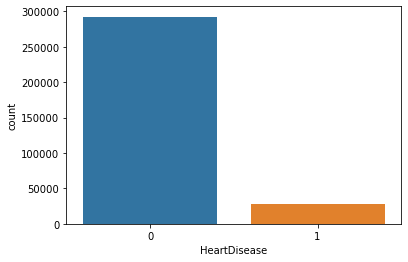

In [20]:
sns.countplot(x='HeartDisease',data=data)

# SMOTE

In [21]:
X = data[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]
y = data.HeartDisease

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle=True, 
                                                    stratify=y)

In [23]:
test = pd.concat([X_test, y_test], axis=1)

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
oversampled = SMOTE(random_state=0)
X_train_smote, y_train_smote = oversampled.fit_resample(X_train, y_train)

In [25]:
train_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

<AxesSubplot:>

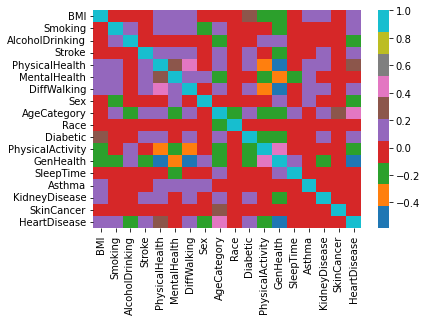

In [26]:
sns.heatmap(train_smote.corr(), cmap='tab10')

In [27]:
train_smote.corr().loc["HeartDisease", :]

BMI                 0.092933
Smoking             0.075172
AlcoholDrinking    -0.160045
Stroke              0.079751
PhysicalHealth      0.243135
MentalHealth        0.045628
DiffWalking         0.178598
Sex                -0.265262
AgeCategory         0.420519
Race               -0.109254
Diabetic            0.120950
PhysicalActivity   -0.263233
GenHealth          -0.467626
SleepTime           0.009837
Asthma             -0.097669
KidneyDisease       0.040832
SkinCancer          0.021672
HeartDisease        1.000000
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

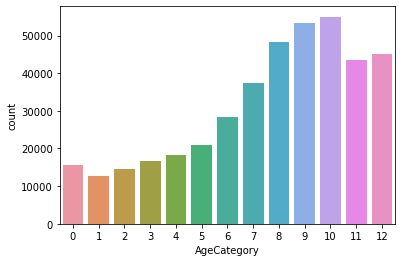

In [28]:
sns.countplot(x='AgeCategory',data=train_smote)

# Forward Stepwise Selection

In [29]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

In [30]:
train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409390 entries, 0 to 409389
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               409390 non-null  float64
 1   Smoking           409390 non-null  int64  
 2   AlcoholDrinking   409390 non-null  int64  
 3   Stroke            409390 non-null  int64  
 4   PhysicalHealth    409390 non-null  float64
 5   MentalHealth      409390 non-null  float64
 6   DiffWalking       409390 non-null  int64  
 7   Sex               409390 non-null  int64  
 8   AgeCategory       409390 non-null  int64  
 9   Race              409390 non-null  int64  
 10  Diabetic          409390 non-null  int64  
 11  PhysicalActivity  409390 non-null  int64  
 12  GenHealth         409390 non-null  int64  
 13  SleepTime         409390 non-null  float64
 14  Asthma            409390 non-null  int64  
 15  KidneyDisease     409390 non-null  int64  
 16  SkinCancer        40

In [31]:
X = train_smote[['BMI', 'Smoking', 'AlcoholDrinking', "Stroke", 'PhysicalHealth', "MentalHealth", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"]]



In [32]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.logit('HeartDisease~' + '+'.join(predictor_subset),data = train_smote).fit()
    llr_pvalue = model.llr_pvalue
    return {"model":model, "llr_pvalue":llr_pvalue}
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [33]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['llr_pvalue'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [34]:
def forward_selection():
    models_best = pd.DataFrame(columns=["llr_pvalue", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [35]:
models_best = forward_selection()


Optimization terminated successfully.
         Current function value: 0.688789
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.690319
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.678547
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689890
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.662103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692104
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.676878
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657472
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.596780
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.687098
  

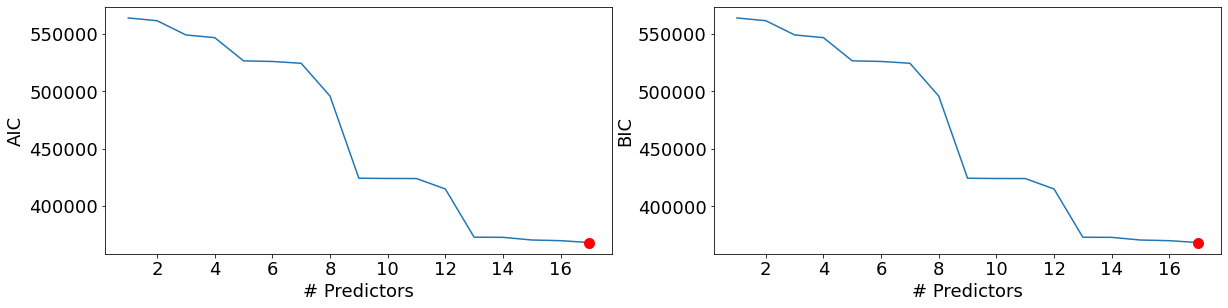

In [36]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    llr_pvalue = models_best.apply(lambda row: row[1].llr_pvalue, axis=1)

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 1)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

             feature        VIF
0              const  76.610469
1                BMI   1.140300
2            Smoking   1.053249
3    AlcoholDrinking   1.031072
4             Stroke   1.036386
5     PhysicalHealth   1.726023
6       MentalHealth   1.232399
7        DiffWalking   1.434284
8                Sex   1.056527
9        AgeCategory   1.348173
10              Race   1.066589
11          Diabetic   1.121755
12  PhysicalActivity   1.277301
13         GenHealth   1.924429
14         SleepTime   1.040386
15            Asthma   1.044145
16     KidneyDisease   1.038851
17        SkinCancer   1.065468


In [38]:
model17 = models_best['model'][17]
model17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               409390
Model:                          Logit   Df Residuals:                   409372
Method:                           MLE   Df Model:                           17
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3515
Time:                        17:36:45   Log-Likelihood:            -1.8402e+05
converged:                       True   LL-Null:                   -2.8377e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9685      0.037     26.514      0.000       0.897       1.040
BMI                  0.0083      0.001     12.123      0.000       0.007       0.010
Smoking             -0.1579      0.008    -18.764      0.000      -0.174      -0.141
AlcoholDrinking     -1.8456      0.030    -61.161      0.000      -1.905      -1.787
Stroke               0.0383      0.021      1.863      0.062      -0.002       0.079
PhysicalHealth      -0.0042      0.001     -7.571      0.000      -0.005      -0.003
MentalHealth         0.0078      0.001     13.986      0.000       0.007       0.009
DiffWalking         -0.4839      0.013    -38.599      0.000      -0.508      -0.459
Sex                 -1.3855      0.009   -157.448      0.000      -1.403      -1.368
AgeCategory          0.3179      0.002    191.949      0.000       0.315       0.321
Race                -0.1203      0.003    -36.348      0.000      -0.127      -0.114
Diabetic            -0.2254      0.011    -19.797      0.000      -0.248      -0.203
PhysicalActivity    -0.5479      0.010    -57.355      0.000      -0.567      -0.529
GenHealth           -1.0060      0.005   -189.411      0.000      -1.016      -0.996
SleepTime           -0.0310      0.003    -10.919      0.000      -0.037      -0.025
Asthma              -0.6575      0.014    -46.034      0.000      -0.685      -0.630
KidneyDisease       -0.4992      0.021    -23.254      0.000      -0.541      -0.457
SkinCancer          -0.5688      0.014    -40.869      0.000      -0.596      -0.542
====================================================================================
"""

# Confusion Matrix for Forward Stepwise

In [39]:
from sklearn.metrics import roc_curve, auc
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))
    return pred_values

Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.3%
FNR = 45.7%
FPR = 16.2%
ROC-AUC = 78.9%


0         0.040546
1         0.455574
2         0.795124
3         0.625702
4         0.033423
            ...   
319790    0.625158
319791    0.054809
319792    0.135472
319793    0.063468
319794    0.621256
Length: 319795, dtype: float64

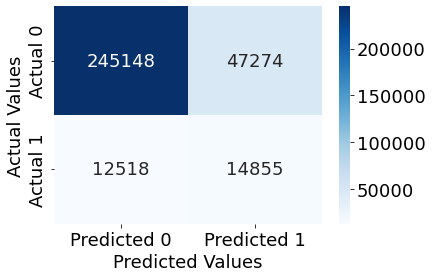

In [40]:
confusion_matrix_data(data,data.HeartDisease,model17,0.6)

# Interactions

In [41]:
#Interaction between Asthma and Smoking
model3 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma*Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()



Optimization terminated successfully.
         Current function value: 0.449491
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.8%
TPR or Recall = 53.8%
FNR = 46.2%
FPR = 16.1%
ROC-AUC = 78.8%


171466    0.884160
43807     0.164664
73864     0.174952
72981     0.426419
280780    0.114998
            ...   
31488     0.077195
117490    0.876228
131937    0.152728
80479     0.773654
21409     0.007212
Length: 95939, dtype: float64

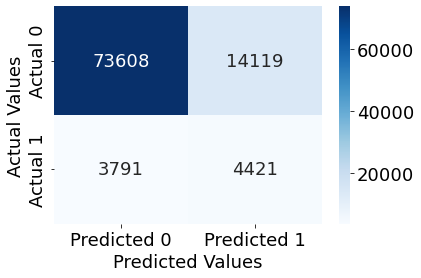

In [42]:
confusion_matrix_data(test,test.HeartDisease,model3,0.6)

In [43]:
#Interaction between Diabetic and Kidney
model4 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma+Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.449373
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.3%
FNR = 45.7%
FPR = 16.2%
ROC-AUC = 78.9%


0         0.039565
1         0.456757
2         0.791334
3         0.627378
4         0.033452
            ...   
319790    0.619643
319791    0.054915
319792    0.136022
319793    0.063549
319794    0.622904
Length: 319795, dtype: float64

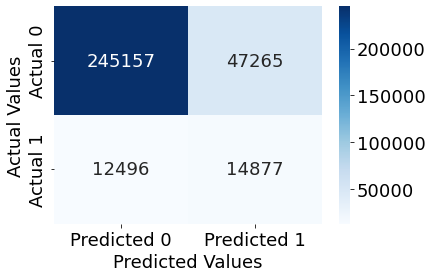

In [44]:
confusion_matrix_data(data,data.HeartDisease,model4,0.6)

In [45]:
#Interaction between both
model5 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma*Smoking+Diabetic*KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.449373
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.3%
FNR = 45.7%
FPR = 16.2%
ROC-AUC = 78.9%


0         0.039565
1         0.456757
2         0.791334
3         0.627378
4         0.033452
            ...   
319790    0.619643
319791    0.054915
319792    0.136022
319793    0.063549
319794    0.622904
Length: 319795, dtype: float64

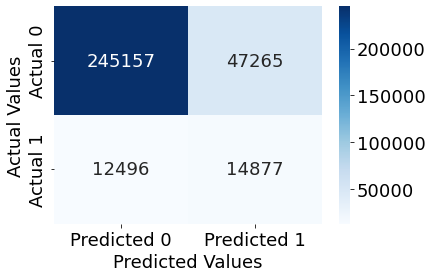

In [46]:
confusion_matrix_data(data,data.HeartDisease,model5,0.6)

In [47]:
#AgeCategory * GenHealth
model6 = sm.logit(formula = 'HeartDisease~AgeCategory*GenHealth+Asthma+Smoking+Diabetic+KidneyDisease+Stroke+Sex+AlcoholDrinking+DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.448554
         Iterations 7


Classification accuracy = 80.9%
Precision = 23.6%
TPR or Recall = 54.7%
FNR = 45.3%
FPR = 16.6%
ROC-AUC = 78.9%


0         0.036530
1         0.490560
2         0.776249
3         0.619466
4         0.029807
            ...   
319790    0.626942
319791    0.044649
319792    0.137065
319793    0.066756
319794    0.606382
Length: 319795, dtype: float64

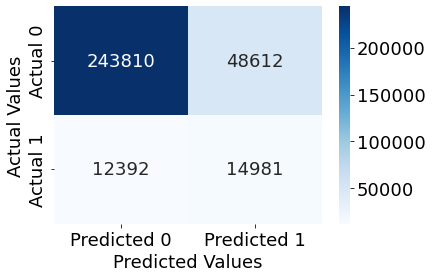

In [48]:
confusion_matrix_data(data,data.HeartDisease,model6,0.6)

In [49]:
model7 = sm.logit(formula = 'HeartDisease~AgeCategory+GenHealth+Asthma+Smoking+Diabetic+KidneyDisease+Sex+AlcoholDrinking+Stroke*DiffWalking+BMI+SkinCancer+MentalHealth+Race+SleepTime+PhysicalActivity+PhysicalHealth', data = train_smote).fit()


Optimization terminated successfully.
         Current function value: 0.449490
         Iterations 7


Classification accuracy = 81.3%
Precision = 23.9%
TPR or Recall = 54.3%
FNR = 45.7%
FPR = 16.2%
ROC-AUC = 78.9%


0         0.040543
1         0.451422
2         0.795188
3         0.625888
4         0.033322
            ...   
319790    0.624558
319791    0.054816
319792    0.135519
319793    0.063478
319794    0.621521
Length: 319795, dtype: float64

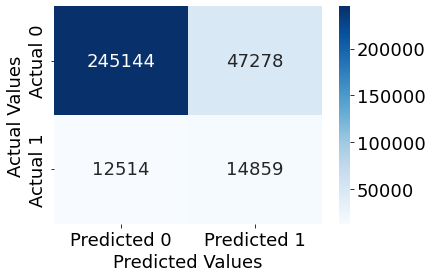

In [50]:
confusion_matrix_data(data,data.HeartDisease,model7,0.6)